In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [3]:
df.drop('id', axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           17334 non-null  float64
 1   Stage_fear                 16631 non-null  object 
 2   Social_event_attendance    17344 non-null  float64
 3   Going_outside              17058 non-null  float64
 4   Drained_after_socializing  17375 non-null  object 
 5   Friends_circle_size        17470 non-null  float64
 6   Post_frequency             17260 non-null  float64
 7   Personality                18524 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()/len(df)*100

Time_spent_Alone              6.424098
Stage_fear                   10.219175
Social_event_attendance       6.370114
Going_outside                 7.914057
Drained_after_socializing     6.202764
Friends_circle_size           5.689916
Post_frequency                6.823580
Personality                   0.000000
dtype: float64

In [6]:
# df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].median(), inplace=True)
# df['Stage_fear'].fillna('No', inplace=True)
# df['Social_event_attendance'].fillna(df['Social_event_attendance'].median(), inplace=True)
# df['Going_outside'].fillna(df['Going_outside'].median(), inplace=True)
# df['Drained_after_socializing'].fillna('No', inplace=True)
# df['Friends_circle_size'].fillna(df['Friends_circle_size'].median(), inplace=True)
# df['Post_frequency'].fillna(df['Post_frequency'].median(), inplace=True)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10189 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           10189 non-null  float64
 1   Stage_fear                 10189 non-null  object 
 2   Social_event_attendance    10189 non-null  float64
 3   Going_outside              10189 non-null  float64
 4   Drained_after_socializing  10189 non-null  object 
 5   Friends_circle_size        10189 non-null  float64
 6   Post_frequency             10189 non-null  float64
 7   Personality                10189 non-null  object 
dtypes: float64(5), object(3)
memory usage: 716.4+ KB


In [10]:
le = LabelEncoder()

df['Stage_fear'] = le.fit_transform(df['Stage_fear'])
df['Personality'] = le.fit_transform(df['Personality'])
df['Drained_after_socializing'] = le.fit_transform(df['Drained_after_socializing'])

In [11]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,0,6.0,4.0,0,15.0,5.0,0
1,1.0,0,7.0,3.0,0,10.0,8.0,0
3,3.0,0,7.0,3.0,0,11.0,5.0,0
7,2.0,0,8.0,3.0,0,4.0,5.0,0
9,1.0,0,8.0,6.0,0,14.0,9.0,0
...,...,...,...,...,...,...,...,...
18509,1.0,0,3.0,4.0,0,15.0,4.0,0
18511,0.0,0,4.0,5.0,0,11.0,4.0,0
18514,6.0,0,5.0,3.0,0,10.0,4.0,0
18519,3.0,0,7.0,3.0,0,9.0,7.0,0


In [12]:
gau = GaussianNB()
X_train = df.drop('Personality', axis=1)
y_train = df['Personality']
             
gau.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [13]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [14]:
X_test = pd.read_csv('test.csv')

In [15]:
id = X_test['id']

In [16]:
X_test.isnull().sum()

id                             0
Time_spent_Alone             425
Stage_fear                   598
Social_event_attendance      397
Going_outside                466
Drained_after_socializing    432
Friends_circle_size          350
Post_frequency               408
dtype: int64

In [17]:
X_test.drop('id', axis=1, inplace=True)

In [18]:
X_test['Time_spent_Alone'].fillna(X_test['Time_spent_Alone'].median(), inplace=True)
X_test['Stage_fear'].fillna('No', inplace=True)
X_test['Social_event_attendance'].fillna(X_test['Social_event_attendance'].median(), inplace=True)
X_test['Going_outside'].fillna(X_test['Going_outside'].median(), inplace=True)
X_test['Drained_after_socializing'].fillna('No', inplace=True)
X_test['Friends_circle_size'].fillna(X_test['Friends_circle_size'].median(), inplace=True)
X_test['Post_frequency'].fillna(X_test['Post_frequency'].median(), inplace=True)

C:\Users\ayush\AppData\Local\Temp\ipykernel_11172\2795733369.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['Time_spent_Alone'].fillna(X_test['Time_spent_Alone'].median(), inplace=True)
C:\Users\ayush\AppData\Local\Temp\ipykernel_11172\2795733369.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [19]:
X_test['Stage_fear'] = le.fit_transform(X_test['Stage_fear'])
X_test['Drained_after_socializing'] = le.fit_transform(X_test['Drained_after_socializing'])

In [20]:
y_pred_gau = gau.predict(X_test)

In [21]:
df_gau = pd.concat([pd.Series(id),pd.Series(y_pred_gau, name='Personality')], axis=1)

In [22]:
df_gau.replace({0: 'Extrovert', 1: 'Introvert'}, inplace=True)

In [23]:
df_gau.to_csv('sample_submission_4.csv', index=True)

In [24]:
t = df.drop('Personality', axis=1)
u = df['Personality']
t_train, t_test, u_train, u_test = train_test_split(t, u, test_size=0.3, random_state=42)

In [25]:
gau.fit(t_train, u_train)

,priors,None
,var_smoothing,1e-09


In [26]:
u_pred_gau = gau.predict(t_test)
accuracy_gau = accuracy_score(u_test, u_pred_gau)
accuracy_gau

0.9584560026169447

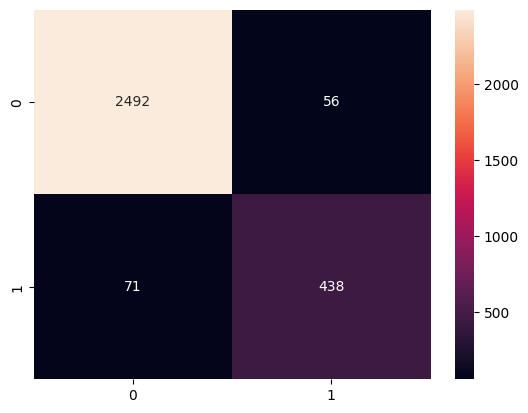

In [27]:
sns.heatmap(confusion_matrix(u_test, u_pred_gau), annot=True, fmt='d')
plt.show()

In [28]:
lr = LogisticRegression()

lr.fit(t_train, u_train)

u_pred_lr = lr.predict(t_test)
accuracy_lr = accuracy_score(u_test, u_pred_lr)
accuracy_lr

0.9584560026169447